# Scraping data

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
url = "https://www.worldometers.info/coronavirus/"
html_page = requests.get(url).text

In [3]:
soup = bs(html_page, 'html.parser')
table_id_today = 'main_table_countries_today'
table_id_yesterday = 'main_table_countries_yesterday'
table_id_yesterday2 = 'main_table_countries_yesterday2'
table_rows = soup.findAll("table", {"id": table_id_today})[0].findAll('tr')[9:9+215]
csv_name = 'Corona_virus_cases_2020_08_13.csv'

In [4]:
# 18 lists corresponding to 18 columns of table
countries = []
tot_cases = []
new_cases = []
tot_deaths = []
new_deaths = []
tot_recov = []
new_recov = []
act_cases = []
ser_cases = []
cases_per_1m = []
deaths_per_1m = []
tot_tests = []
tests_per_1m = []
population = []
one_case_xpll = []
one_death_xpll = []
one_test_xpll = []
region = []

In [5]:
# convert text to in. Example: '123,256' -> 123256
def text_to_int(text):
    try:
        text = text.replace(',', '')
        text = text.replace('+', '')
        text = pd.to_numeric(text, downcast='float')
    except:
        text = 0.0
    if text != text:
        return 0
    a = int(text)
    return a

In [6]:
# Get data of each country
for tr in table_rows:
    td = tr.find_all('td')
    countries.append(td[1].text.strip())
    tot_cases.append(text_to_int(td[2].text.strip()))
    new_cases.append(text_to_int(td[3].text.strip()))
    tot_deaths.append(text_to_int(td[4].text.strip()))
    new_deaths.append(text_to_int(td[5].text.strip()))
    new_recov.append(text_to_int(td[7].text.strip()))
    tot_recov.append(text_to_int(td[6].text.strip()))
    act_cases.append(text_to_int(td[8].text.strip()))
    ser_cases.append(text_to_int(td[9].text.strip()))
    cases_per_1m.append(text_to_int(td[10].text.strip()))
    deaths_per_1m.append(text_to_int(td[11].text.strip()))
    tot_tests.append(text_to_int(td[12].text.strip()))
    tests_per_1m.append(text_to_int(td[13].text.strip()))
    population.append(text_to_int(td[14].text.strip()))
    one_case_xpll.append(text_to_int(td[16].text.strip()))
    one_death_xpll.append(text_to_int(td[17].text.strip()))
    one_test_xpll.append(text_to_int(td[18].text.strip()))
    if len(td[15].text.strip()) == 0:
        region.append('N/A')
    else:
        region.append(td[15].text.strip())

In [7]:
# indices: from 1 to 215 (countries)
indices = [i for i in range(1,len(countries)+1)]
# name of columns
headers = ["Country", "Total Cases", "New Cases", "Total Deaths", "New Deaths", "Total Recovered", "New Recovered", "Active Cases", "Serious Cases", "Tot Cases/1M pop", "Death/1M pop", "Total Tests", "Tests/1M pop", "Population", "1 Case every X ppl", "1 Death every X ppl", "1 Test every X ppl", "Region"]

In [8]:
df = pd.DataFrame(list(zip(countries, tot_cases, new_cases, tot_deaths, new_deaths, tot_recov, new_recov, act_cases, ser_cases, cases_per_1m, deaths_per_1m, tot_tests, tests_per_1m, population, one_case_xpll, one_death_xpll, one_test_xpll, region)),index=indices,columns=headers)
df = df.sort_values(by='Total Cases', ascending=False)
df.index = range(1,len(df)+1)
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Cases,Tot Cases/1M pop,Death/1M pop,Total Tests,Tests/1M pop,Population,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,Region
1,USA,5360302,0,169131,0,2812603,0,2378568,17320,16183,511,67551160,203940,331229888,62,1958,5,North America
2,Brazil,3170474,0,104263,0,2309477,0,756734,8318,14903,490,13231548,62197,212735424,67,2040,16,South America
3,India,2399992,4521,47169,31,1697811,1951,655012,8944,1737,34,26845688,19431,1381567232,576,29290,51,Asia
4,Russia,907758,5057,15384,124,716396,6098,175978,2300,6220,105,31500000,215839,145941952,161,9487,5,Europe
5,South Africa,568919,0,11010,0,432029,0,125880,539,9579,185,3295434,55484,59393824,104,5395,18,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Western Sahara,10,0,1,0,8,0,1,0,17,2,0,0,598924,59892,598924,0,Africa
212,MS Zaandam,9,0,2,0,0,0,7,0,0,0,0,0,0,0,0,0,N/A
213,British Virgin Islands,9,0,1,0,7,0,1,0,297,33,1522,50307,30254,3362,30254,20,North America
214,Saint Pierre Miquelon,4,0,0,0,1,0,3,0,691,0,0,0,5791,1448,0,0,North America


In [9]:
# save df as a csv file
df.to_csv(csv_name)

# Visualization

* Heatmap

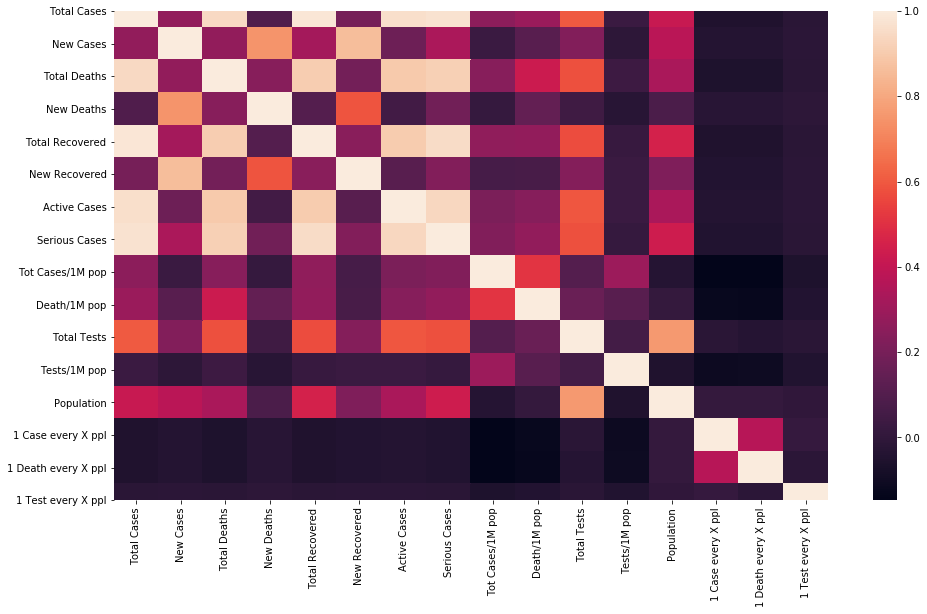

In [10]:
corr = df.corr()
plt.figure(figsize = (16,9))
sns.heatmap(corr)
plt.show()

* Top 20 Deaths per 1M population

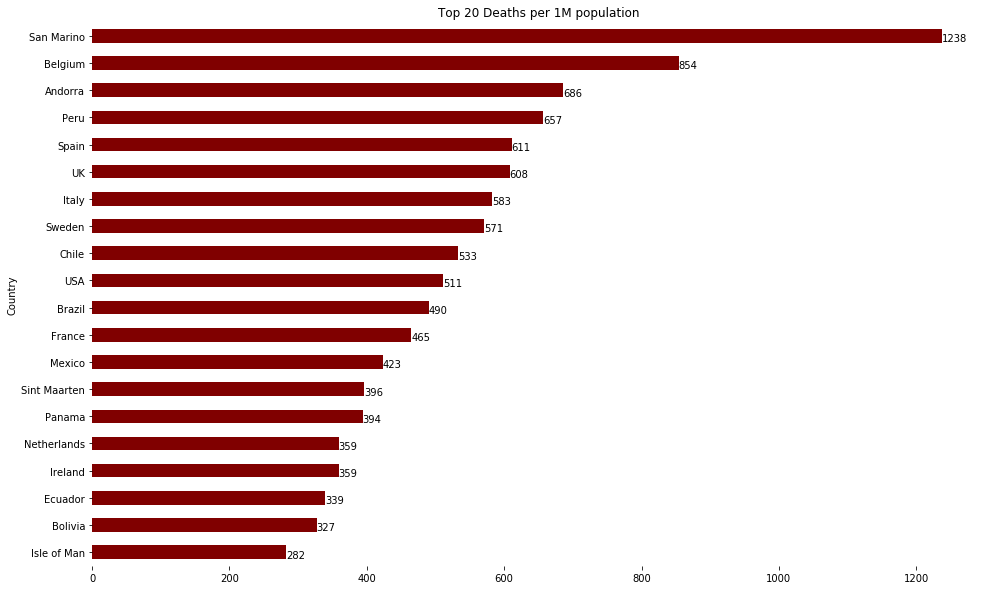

In [11]:
dp1m = df.nlargest(20,'Death/1M pop')[['Country', 'Death/1M pop']] # get top 20 highest Death/1M pop
dp1m.index = range(1,len(dp1m)+1)
ax = dp1m[::-1].plot.barh(x='Country', y='Death/1M pop', figsize=(16, 10), color = "maroon", legend=False, title = 'Top 20 Deaths per 1M population')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for i, v in enumerate(dp1m[::-1]['Death/1M pop']):
    ax.text(v, i-.2, str(v))

* Top 20 countries have highest total cases.

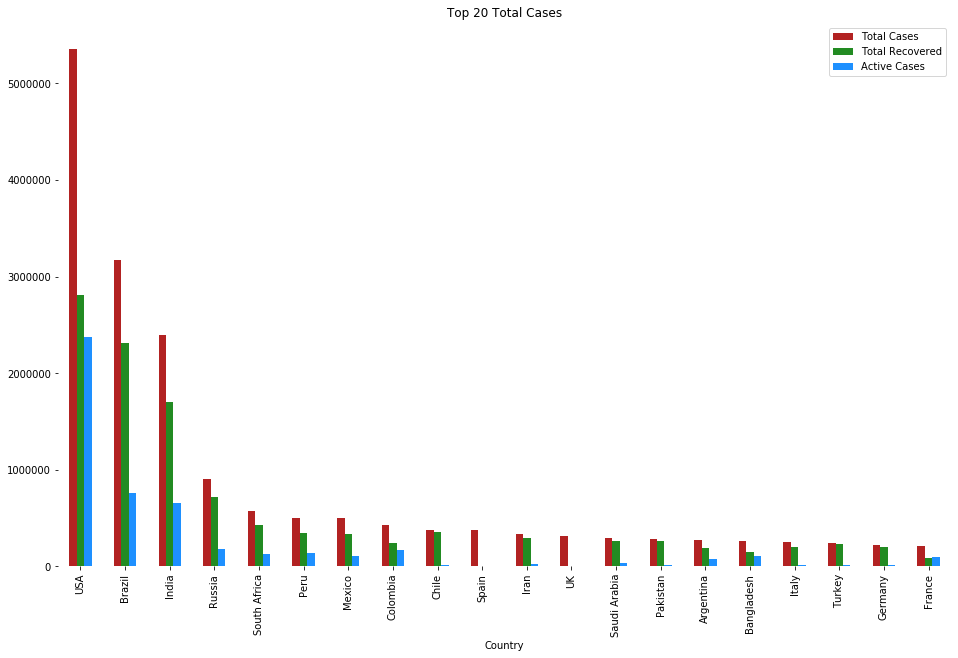

In [12]:
cad = df.nlargest(20,'Total Cases')[['Country', 'Total Cases', 'Total Recovered', 'Active Cases']]
cad.index = range(1,len(cad)+1)
ax = cad.plot.bar(x='Country', y={'Total Cases', 'Total Recovered', 'Active Cases'}, figsize=(16, 10), color = {"forestgreen", "dodgerblue", "firebrick"}, legend=True, title = 'Top 20 Total Cases')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

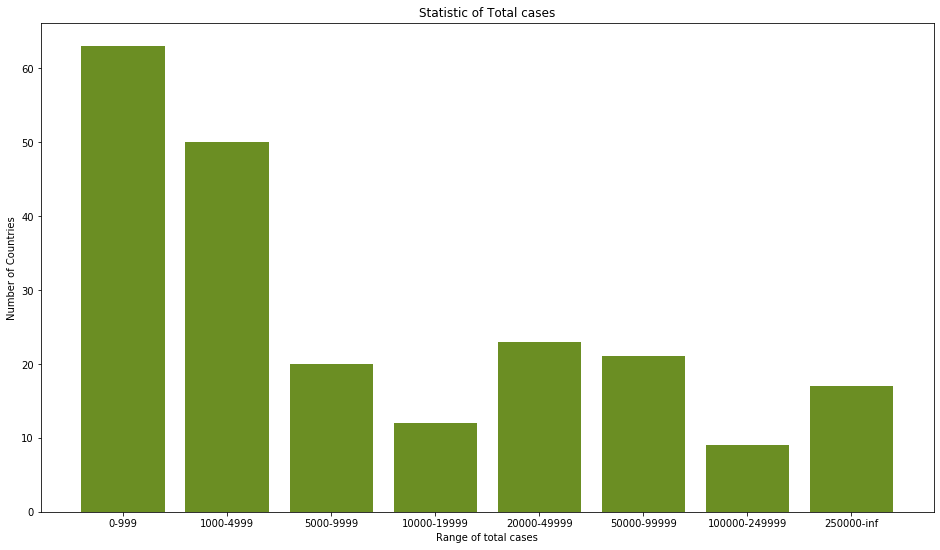

In [13]:
range_ = [0, 1000, 5000, 10000, 20000, 50000, 100000, 250000, 2000000000]
xtext = []
for i in range(len(range_) - 2):
    xtext.append(str(range_[i]) + '-' + str(range_[i+1]-1))
xtext.append(str(range_[len(range_)-2]) + '-inf')
range_tot_cases = []
list_tot = df['Total Cases'].to_list()
for i in range(len(range_) - 1):
    c = 0
    for j in list_tot:
        if j >= range_[i] and j < range_[i+1]:
            c += 1
    range_tot_cases.append(c)
x_pos = [i for i, _ in enumerate(xtext)]
plt.figure(figsize=(16, 9))
plt.bar(x_pos, range_tot_cases, color='olivedrab')
plt.xlabel("Range of total cases")
plt.ylabel("Number of Countries")
plt.title("Statistic of Total cases")
plt.xticks(x_pos, xtext)
plt.show()

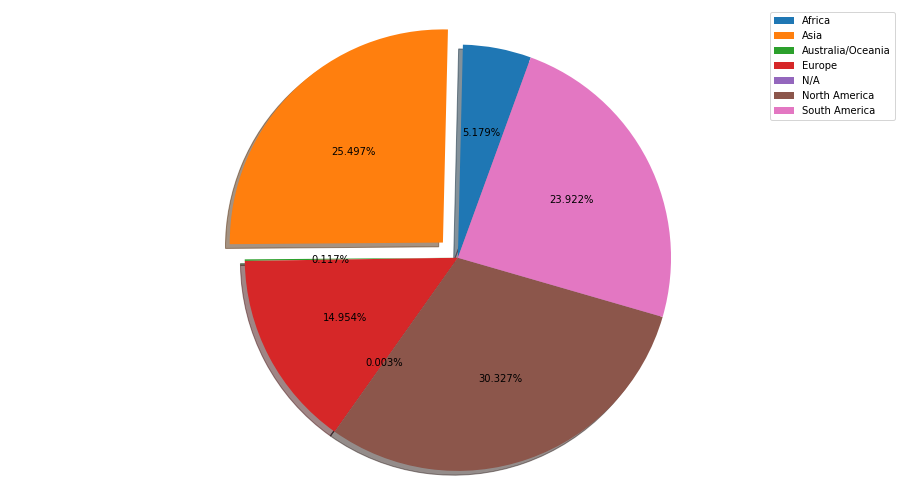

In [14]:
labels = np.unique(df['Region'])
df_tmp = df[['Region', 'Total Cases']].groupby('Region').agg(sum)
dict_tmp = df_tmp.to_dict()['Total Cases']
sizes = [0] * len(labels)
for i in range(len(sizes)):
    for j, k in dict_tmp.items():
        if labels[i] == j:
            sizes[i] = k
explode = (0, 0.1, 0, 0, 0, 0, 0)

patches, texts, autotexts = plt.pie(sizes, explode=explode, colors=mcolors.TABLEAU_COLORS, autopct='%1.3f%%', shadow=True, startangle=70)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show()

* Top 5 New Recovered by Country in the surveyed period (from 2020-08-05 to 2020-08-09)

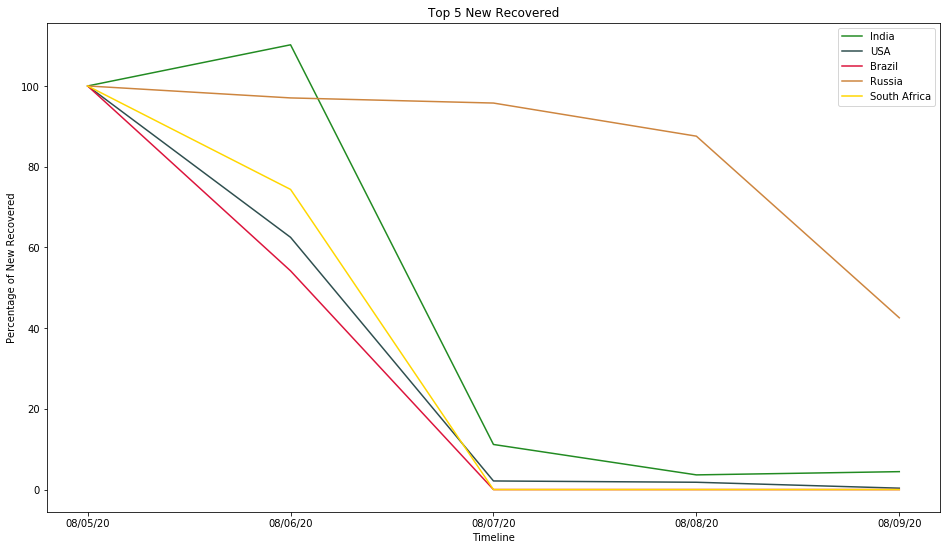

In [15]:
from datetime import datetime
df_sur = []
date = []
for i in range(5, 9+1):
    if i < 10:
        s = '0' + str(i)
    else:
        s = str(i)
    tmp = pd.read_csv('Corona_virus_cases_2020_08_' + s + '.csv')
    tmp['Date'] = datetime.strptime('08/' + s + '/20', '%m/%d/%y')
    date.append('08/' + s + '/20')
    df_sur.append(tmp)
    
df_res = pd.concat(df_sur)
df_res = df_res.drop(['Unnamed: 0'], axis = 1)
df_res = df_res.sort_values(by=['Country', 'Date'])
df_res.index = range(1,len(df_res)+1)

df_tmp = df_res[['Country', 'New Recovered']].groupby(['Country']).agg(sum).sort_values(by=['New Recovered'], ascending=False)
top_5 = df_tmp.index[0:5].to_list()

country_timeline = [0] * len(top_5)
for i in range(len(top_5)):
    df_co = df_res[df_res['Country'] == top_5[i]]
    df_co_rc = df_co[['New Recovered']]/df_co.iloc[0]['New Recovered']*100
    country_timeline[i] = df_co_rc['New Recovered'].to_list()

plt.figure(figsize=(16, 9))
colors_ = ['forestgreen', 'darkslategray', 'crimson', 'peru', 'gold']
for i, country in enumerate(country_timeline):
    plt.plot(date, country, color=colors_[i])
plt.legend(top_5)
plt.xlabel('Timeline')
plt.ylabel('Percentage of New Recovered')
plt.title('Top 5 New Recovered')
plt.show()

* Top 5 New Cases by Country in the surveyed period (from 2020-08-05 to 2020-08-09)

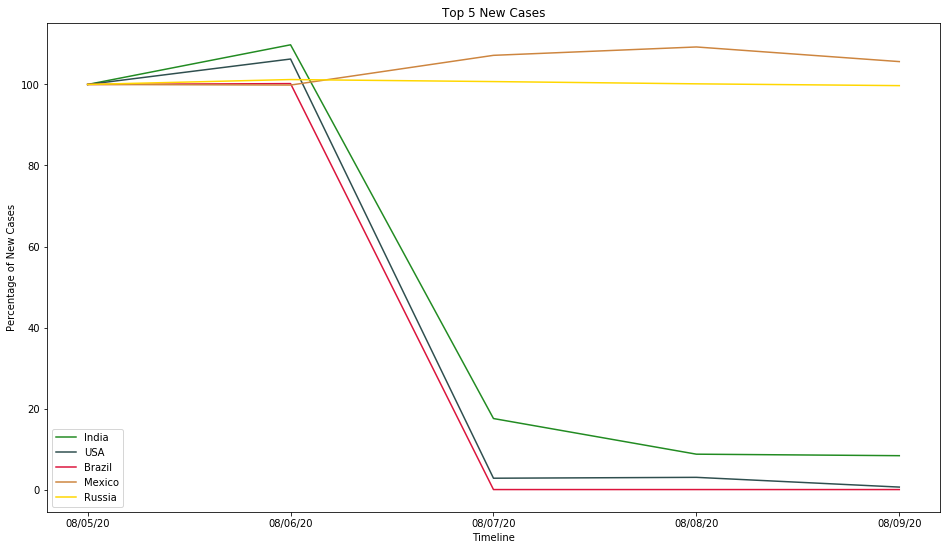

In [16]:
df_tmp = df_res[['Country', 'New Cases']].groupby(['Country']).agg(sum).sort_values(by=['New Cases'], ascending=False)
top_5 = df_tmp.index[0:5].to_list()

country_timeline = [0] * len(top_5)
for i in range(len(top_5)):
    df_co = df_res[df_res['Country'] == top_5[i]]
    df_co_rc = df_co[['New Cases']]/df_co.iloc[0]['New Cases']*100
    country_timeline[i] = df_co_rc['New Cases'].to_list()

plt.figure(figsize=(16, 9))
colors_ = ['forestgreen', 'darkslategray', 'crimson', 'peru', 'gold']
for i, country in enumerate(country_timeline):
    plt.plot(date, country, color=colors_[i])
plt.legend(top_5)
plt.xlabel('Timeline')
plt.ylabel('Percentage of New Cases')
plt.title('Top 5 New Cases')
plt.show()

* Virus Spread

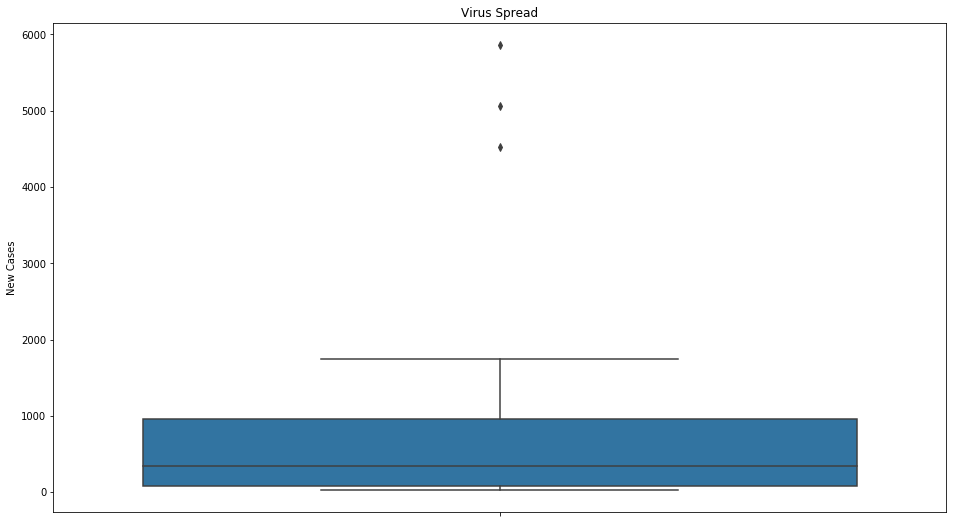

In [17]:
plt.figure(figsize=(16,9))
plt.title('Virus Spread')
top_20_new_cases = df.nlargest(20, 'New Cases')
sns.boxplot(y=top_20_new_cases['New Cases'])
plt.show()

Inference: Among 20 countries with top cases, there're about 335 to 1346 cases in the next day

* The relionship between Active Cases and New Deaths

Correlation:  0.051201794880909944


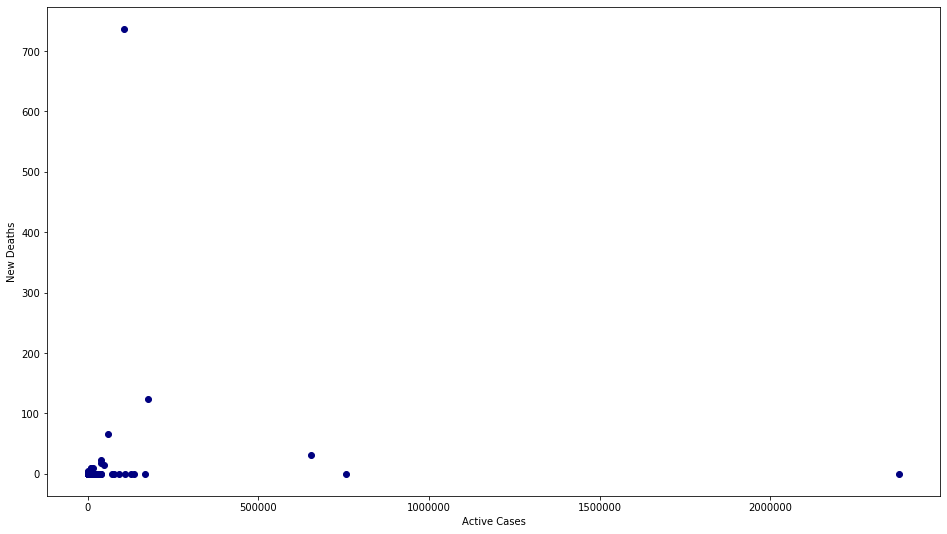

In [18]:
xname = 'Active Cases'
yname = 'New Deaths'
ndf = df[['Country', yname, xname]]
ndf.index = range(1,len(ndf)+1)
print('Correlation: ', ndf[yname].corr(ndf[xname]))
X = ndf[xname].values.reshape(-1, 1)
Y = ndf[yname].values.reshape(-1, 1)
plt.figure(figsize=(16, 9))
plt.scatter(X, Y, color='navy')
plt.xlabel(xname)
plt.ylabel(yname)
plt.show()

Inference: This is an independence relationship. Because correlation is very small

* The relionship between Active Cases and Total Cases

Correlation:  0.9609069208015778


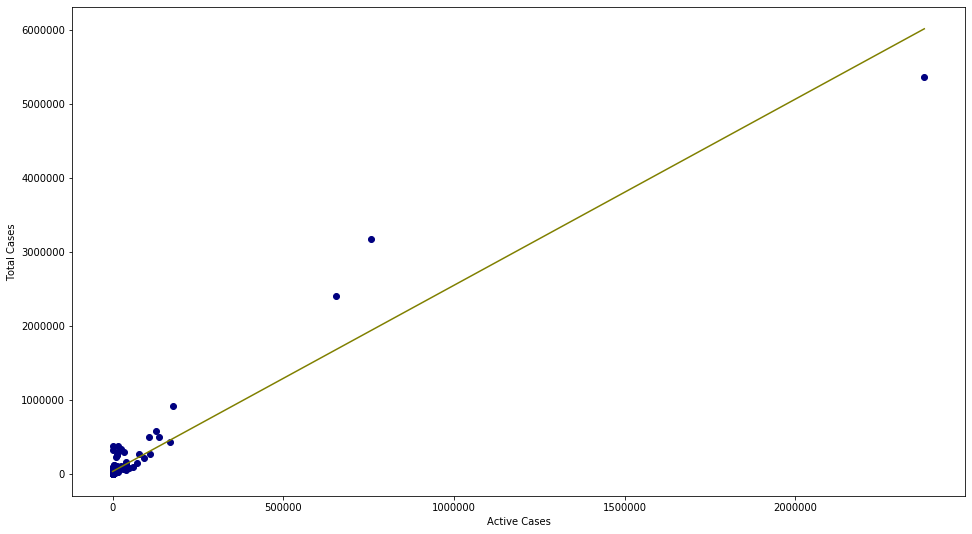

In [19]:
xname = 'Active Cases'
yname = 'Total Cases'
ndf = df[['Country', yname, xname]]
ndf.index = range(1,len(ndf)+1)
print('Correlation: ', ndf[yname].corr(ndf[xname]))
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
X = ndf[xname].values.reshape(-1, 1)
Y = ndf[yname].values.reshape(-1, 1)
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.figure(figsize=(16, 9))
plt.scatter(X, Y, color='navy')
plt.plot(X, Y_pred, color='olive')
plt.xlabel(xname)
plt.ylabel(yname)
plt.show()

Inference: This is an dependence relationship due to correlation is close to 1